# Gradient Descent with Nesterov Momentum 

Gradient descent is an ```optimization algorithm``` that follows the ```negative``` gradient of an objective function in order to locate the minimum of the function.

A limitation of gradient descent is that it can get stuck in ```flat areas or bounce around``` if the objective function returns ```noisy gradients```. <b>```Momentum```</b> is an approach that accelerates the progress of the search to ``skim`` across flat areas and smooth out ```bouncy``` gradients.

In some cases, the acceleration of momentum can cause the search to ```miss or overshoot the minima``` at the bottom of basins or valleys. <b>```Nesterov momentum```</b> is an extension of momentum that involves calculating the ```decaying moving average``` of the gradients of projected positions in the search space rather than the actual positions themselves.

This has the effect of harnessing the ```accelerating benefits``` of momentum whilst allowing the search to ```slow down``` when approaching the optima and reduce the likelihood of <b>missing</b> or <b>overshooting</b> it.

## Gradient Descent

### Gradient

```First Order derivate``` of the multivariate objective Function. The derivative or the gradient points in the direction of the ```steepest ascent``` of the target function for a specific input.

----------
Gradient descent refers to a ```minimization``` optimization algorithm that follows the negative of the gradient downhill of the target function to locate the ```minimum``` of the function.

The gradient descent algorithm requires a target function that is being optimized and the derivative function for the objective function. The ```target function f()``` returns a score for a given set of inputs, and the derivative ```function f'()``` gives the ```derivative``` of the target function for a given set of inputs.

The gradient descent algorithm requires a ```starting point (x)``` in the problem, such as a randomly selected point in the input space.

The derivative is then calculated and a ```step``` is taken in the input space that is expected to result in a ```downhill movement``` in the target function, assuming we are minimizing the target function.

A ```downhill``` movement is made by first calculating how far to move in the input space, calculated as the steps size (called alpha or the learning rate) multiplied by the gradient. This is then subtracted from the current point, ensuring we move against the gradient, or down the target function.

                                            x(t+1) = x(t) – step_size * f'(x(t))
                                            
                                            
The steeper the objective function at a given point, the larger the magnitude of the gradient, and in turn, the larger the step taken in the search space. The size of the step taken is scaled using a ```step size hyperparameter```.

- <b>Step Size (alpha)</b>: Hyperparameter that controls how far to move in the search space against the gradient each iteration of the algorithm.

If the step size is too small, the movement in the search space will be ```small```, and the search will take a long time. If the step size is too large, the search may ```bounce around``` the search space and skip over the optima.

## Nesterov Momentum

Nesterov Momentum is an extension to the gradient descent optimization algorithm.

Nesterov Momentum is just like more traditional momentum except the update is performed using the ```partial derivative``` of the projected update rather than the ```derivative``` current variable value.

Traditional momentum involves maintaining an ```additional variable``` that represents the last update performed to the variable, an ```exponentially decaying moving average of past gradients```.

This last update or last change to the variable is then added to the variable scaled by a ```“momentum”``` hyperparameter that controls how much of the last change to add, e.g. 0.9 for 90%. It is easier to think about this update in terms of ```two steps```, e.g calculate the change in the variable using the ```partial derivative``` then calculate the ```new value``` for the variable.

- change(t+1) = (momentum * change(t)) – (step_size * f'(x(t)))
- x(t+1) = x(t) + change(t+1)

We can think of momentum in terms of a ball rolling downhill that will accelerate and continue to go in the same direction even in the presence of small hills.

A problem with momentum is that acceleration can sometimes cause the search to ```overshoot``` the minima at the bottom of a basin or valley floor.

<b>```Nesterov Momentum```</b> can be thought of as a modification to momentum to overcome this problem of overshooting the minima.

It involves first calculating the ```projected position``` of the variable using the change from the ```last``` iteration and using the derivative of the projected position in the calculation of the new position for the variable.

Calculating the ```gradient``` of the projected position acts like a ```correction factor``` for the acceleration that has been accumulated.

### Steps:
1. First, the projected position of the entire solution is calculated using the change calculated in the last iteration of the algorithm.

        projection(t+1) = x(t) + (momentum * change(t))
2. Calculate the gradient for this new position.
          
        gradient(t+1) = f'(projection(t+1))
3. Now we can calculate the ```new position``` of each variable using the ```gradient``` of the projection, first by calculating the change in each variable.

        change(t+1) = (momentum * change(t)) – (step_size * gradient(t+1))
4. Finally, calculating the ```new value``` for each variable using the calculated change.
        
        x(t+1) = x(t) + change(t+1)
        
        
In the field of convex optimization more generally, ```Nesterov Momentum``` is known to improve the rate of convergence of the optimization algorithm (e.g. reduce the number of iterations required to find the solution). Although the technique is effective in training neural networks, it may not have the same general effect of ```accelerating convergence```.

## Gradient Descent with Nesterov Momentum

### 1. Two-Dimensional Test 

Defining the optimization Function, using a ```simple 2D function``` that squares the input of each dimension and define the range of valid inputs from ```-1.0 to 1.0```.

In [1]:
def objective(x, y):
    return x**2.0 + y**2.0

Create a ```3D``` Plot of the dataset to see the curvature of the ```response surface```. 

In [2]:
# 3D Plot of the Function
import numpy as np
from matplotlib import pyplot as plt

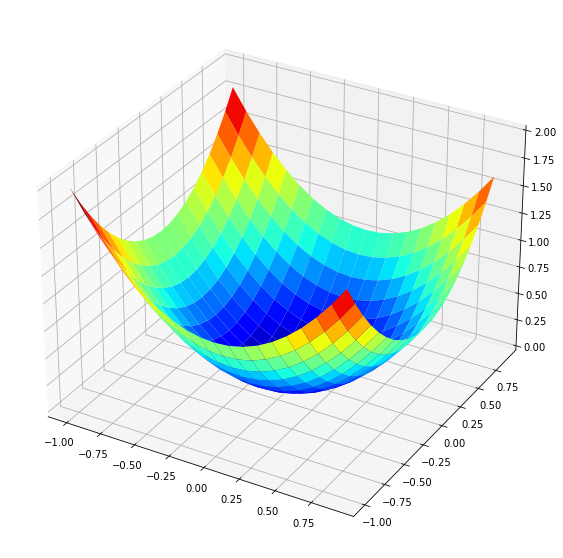

In [7]:
# Range for Input
r_min, r_max = -1.0, 1.0

# Sample input range uniformly at 0.1 increment
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)

# Create a meshgrid from the axis
x, y = np.meshgrid(xaxis, yaxis)

# Compute Targets
results = objective(x, y)

# Create Surface Plot 
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, results, cmap='jet')
plt.show()

Creating a ```2D``` Plot ```Contour Plot``` of the Function

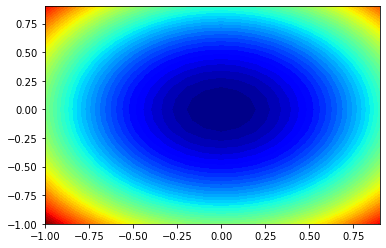

In [8]:
# range for input 
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Sample Input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = np.arange(bounds[1, 0], bounds[1, 1], 0.1)

# Create a 2D Mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# Compute results
results = objective(x, y)

# Create a Contour Plot with 50 levels
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.show()

## Gradient Descent Optimization using Nesterov Momentum

In [10]:
# Function to calculate derivative
def derivative(x, y):
    return np.asarray([x * 2.0, y * 2.0])

```nesterov()``` function takes the names of the ```objective function``` and the ```derivative function```, an ```array``` with bounds of the domain and ```hyparameter values``` for the total number of algo iterations, ```learning rate``` and ```momentum```

It returns the ```solution```

In [13]:
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
    # Initial Point
    sol = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # List of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
    
    # Gradient Descent
    for it in range(n_iter):
        # Cal. Projected Solution
        projected = [sol[i] + momentum * change[i] for i in range(sol.shape[0])]
        # Calculate Gradient of the Projection
        gradient = derivative(projected[0], projected[1])
        # Build new Solution in this Variable
        new_sol = list()
        for i in range(sol.shape[0]):
            # Calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
            # Calculate the new position in this variable
            value = sol[i] + change[i]
            # Store it
            new_sol.append(value)

        # Evaluate Candidate Point
        sol = np.asarray(new_sol)
        sol_eval = objective(sol[0], sol[1])

        # Print report Progress
        print('>%d f(%s) = %.5f' % (it, sol, sol_eval))
    
    return [sol, sol_eval]

In [20]:
# Run it
np.random.seed(1)
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 100
step_size = 0.1
momentum = 0.3

best, score = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done')
print('f(%s) = %f' % (best, score))

>0 f([-0.13276479  0.35251919]) = 0.14190
>1 f([-0.09824595  0.2608642 ]) = 0.07770
>2 f([-0.07031223  0.18669416]) = 0.03980
>3 f([-0.0495457   0.13155452]) = 0.01976
>4 f([-0.03465259  0.0920101 ]) = 0.00967
>5 f([-0.02414772  0.06411742]) = 0.00469
>6 f([-0.01679701  0.04459969]) = 0.00227
>7 f([-0.01167344  0.0309955 ]) = 0.00110
>8 f([-0.00810909  0.02153139]) = 0.00053
>9 f([-0.00563183  0.01495373]) = 0.00026
>10 f([-0.00391092  0.01038434]) = 0.00012
>11 f([-0.00271572  0.00721082]) = 0.00006
>12 f([-0.00188573  0.00500701]) = 0.00003
>13 f([-0.00130938  0.0034767 ]) = 0.00001
>14 f([-0.00090918  0.00241408]) = 0.00001
>15 f([-0.0006313   0.00167624]) = 0.00000
>16 f([-0.00043835  0.00116391]) = 0.00000
>17 f([-0.00030437  0.00080817]) = 0.00000
>18 f([-0.00021134  0.00056116]) = 0.00000
>19 f([-0.00014675  0.00038964]) = 0.00000
>20 f([-0.00010189  0.00027055]) = 0.00000
>21 f([-7.07505806e-05  1.87858067e-04]) = 0.00000
>22 f([-4.91260884e-05  1.30440372e-04]) = 0.00000
>23 f

## Visualize of Nesterov Momentum

Updated ```Nesterov()``` Function to maintain a list of all solutions during the search and then return it

In [26]:
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
    solutions = list() # Track all solutions
    
    # Initial Point
    sol = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # List of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
    # Run the Gradient descent
    for it in range(n_iter):
        # Calculate the projected solution
        projected = [sol[i] + momentum * change[i] for i in range(sol.shape[0])]
        # Calculate the gradient for the projection
        gradient = derivative(projected[0], projected[1])
        # Build a new solution one variable at a time
        new_sol = list()
        for i in range(sol.shape[0]):
            # Calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
            # Calculate the new position in this variable
            value = sol[i] + change[i]
            # Store the variable
            new_sol.append(value)
        # Store the new Solution
        sol = np.asarray(new_sol)
        solutions.append(sol)
        
        # Evaluate Candidate Point
        sol_eval = objective(sol[0], sol[1])
        
        # Report Progress
        print('>%d f(%s) = %.5f' % (it, sol, sol_eval))
    
    return solutions

>0 f([-0.16263687  0.43183601]) = 0.21293
>1 f([-0.15678194  0.41628991]) = 0.19788
>2 f([-0.14905604  0.39577597]) = 0.17886
>3 f([-0.14001781  0.37177753]) = 0.15782
>4 f([-0.13013149  0.34552719]) = 0.13632
>5 f([-0.11977798  0.31803639]) = 0.11549
>6 f([-0.10926527  0.29012287]) = 0.09611
>7 f([-0.09883799  0.26243621]) = 0.07864
>8 f([-0.08868625  0.23548115]) = 0.06332
>9 f([-0.07895356  0.20963876]) = 0.05018
>10 f([-0.06974406  0.18518555]) = 0.03916
>11 f([-0.06112894  0.16231052]) = 0.03008
>12 f([-0.0531521   0.14113029]) = 0.02274
>13 f([-0.04583521  0.12170238]) = 0.01691
>14 f([-0.03918207  0.10403685]) = 0.01236
>15 f([-0.03318236  0.08810634]) = 0.00886
>16 f([-0.02781495  0.0738547 ]) = 0.00623
>17 f([-0.0230506   0.06120431]) = 0.00428
>18 f([-0.01885433  0.05006232]) = 0.00286
>19 f([-0.01518737  0.04032576]) = 0.00186
>20 f([-0.01200873  0.03188577]) = 0.00116
>21 f([-0.0092765   0.02463111]) = 0.00069
>22 f([-0.0069489   0.01845084]) = 0.00039
>23 f([-0.00498509  0

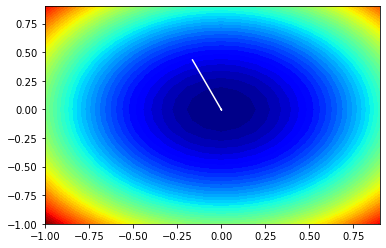

In [29]:
np.random.seed(1)
# Define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.01
momentum = 0.8

solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)

xaxis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = np.arange(bounds[1, 0], bounds[1, 1], 0.1)

# Create MeshGrid from axis
x, y = np.meshgrid(xaxis, yaxis)
# Compute Targets
results = objective(x, y)


# Create a Filled ContourPlot with 50 levels 
plt.contourf(x, y, results, levels=50, cmap='jet')
solutions = np.asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '-', color='w')
plt.show()